# Arctan Activation Function

For this project, I have created a CNN model with Arctan (Inverse Tangent) function as an activation function and compared its performance with traditional models with ReLU and Sigmoid activation function.

In [1]:
# Importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

# Below are imported specifically to create cusom activation function
from keras import ops

## Importing and Preparing Data

We can use load_data() to conveniently import MNIST data set into our matrices. The MNIST data set from Keras contains 70,000 28x28 grayscale images, 60,000 of which are training data and 10,000 of which are test data. Images are normalized in range by dividing by 255.

In [2]:
# Importing MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
# Dividing by 255.0 
train_X = train_X/255.0
test_X = test_X/255.0

## Implementing the Arctan Activation Function

We can use the arctan() function from keras.ops as it allows tensor input and output. We can also add further modifications to the calculation to limit the range of this activation function to [0, 1] just like sigmoid activation function

In [4]:
def arctan_activation(x):
    x = (1/np.pi)*keras.ops.arctan(x) + 0.5
    return x

Then, we can write a simple code below to confirm our arctan function

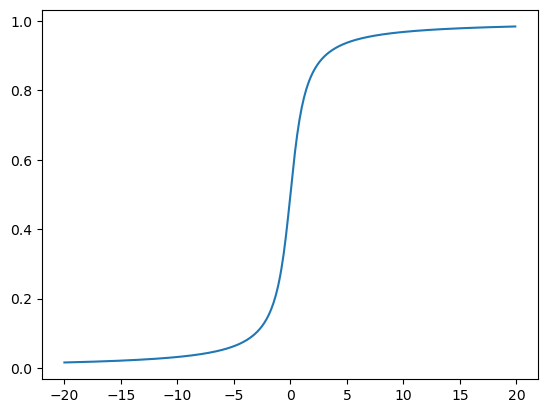

In [5]:
graph_x = np.arange(start=-20, stop=20, step=0.1) # array of values from -20 to 20, with step size of 0.1
graph_y = arctan_activation(graph_x) # arctan values of input values from graph_x

plt.plot(graph_x, graph_y)

# Training CNN

We are going to use Keras to create a simple CNN model using three hidden layers with arctan activation function and the final layer with softmax.

In [6]:
# Model Network
modelArctan = keras.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=arctan_activation),
        tf.keras.layers.Dense(128,activation=arctan_activation),
        tf.keras.layers.Dense(64,activation=arctan_activation),
        tf.keras.layers.Dense(10,activation='softmax')
    ]
)

# Model Compilation 
modelArctan.compile(loss='SparseCategoricalCrossentropy', 
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Model Training
modelArctan.fit(train_X, train_y, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7386 - loss: 0.9882
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.9478 - loss: 0.1857
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9656 - loss: 0.1221


# Testing CNN

We can test the model's performance and compare it with two other models, each with ReLU and Sigmoid as their activation functions.

## Creating CNN with ReLU and Sigmoid

In [7]:
# ReLU activation function

# Model Network
modelRelu = keras.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ]
)

# Model Compilation 
modelRelu.compile(loss='SparseCategoricalCrossentropy', 
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Model Training
modelRelu.fit(train_X, train_y, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8729 - loss: 0.4286
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9690 - loss: 0.1016
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.9783 - loss: 0.0708


In [8]:
# Sigmoid activation function

# Model Network
modelSigmoid = keras.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='sigmoid'),
        tf.keras.layers.Dense(128,activation='sigmoid'),
        tf.keras.layers.Dense(64,activation='sigmoid'),
        tf.keras.layers.Dense(10,activation='softmax')
    ]
)

# Model Compilation 
modelSigmoid.compile(loss='SparseCategoricalCrossentropy', 
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Model Training
modelSigmoid.fit(train_X, train_y, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7265 - loss: 0.9590
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.9472 - loss: 0.1825
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.9637 - loss: 0.1229


## Running the Three Models on Test Dataset

In [9]:
loss_arctan, accuracy_arctan =  modelArctan.evaluate(test_X, test_y)
loss_relu, accuracy_relu =  modelRelu.evaluate(test_X, test_y)
loss_sigmoid, accuracy_sigmoid =  modelSigmoid.evaluate(test_X, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9585 - loss: 0.1378
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9702 - loss: 0.0989
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.9641 - loss: 0.1190


In [10]:
print("Arctan activation function: accuracy = %4f, loss = %4f" % (accuracy_arctan, loss_arctan))
print("ReLU activation function: accuracy = %4f, loss = %4f" % (accuracy_relu, loss_relu))
print("Sigmoid activation function: accuracy = %4f, loss = %4f" % (accuracy_sigmoid, loss_sigmoid))

Arctan activation function: accuracy = 0.963100, loss = 0.124795
ReLU activation function: accuracy = 0.973300, loss = 0.087337
Sigmoid activation function: accuracy = 0.968100, loss = 0.107167


The result shows the ReLU activation function yields the highest accuracy, followed by Sigmoid and Arctan. However, their difference in performance is negligible, and we cannot determine which is better or worse. I was nevertheless happy to see that my arctan function performing just as well. 

Arctan activation function has a very similar shape to sigmoid function, and its accuracy does not fall behind sigmoid. However, in terms of performance, calculating arctan does take longer, and it can cause problems with back propagation when creating certain models.